## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.21.2


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1233407 #insert your ID number here
np.random.seed(ID)

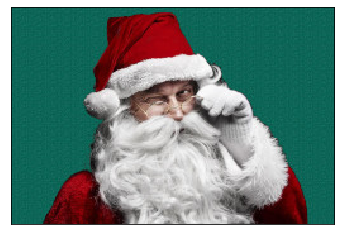

Santa Claus image:  (172, 256, 3)


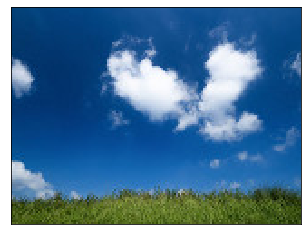

Landscape image:  (120, 160, 3)


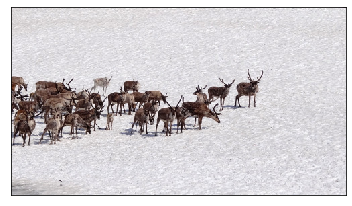

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")


ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


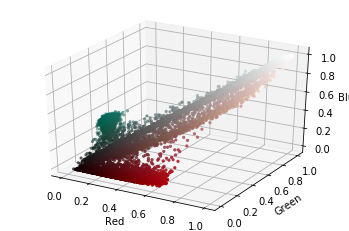

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def my_kmeans(points, k):
    max_iters = 15
    index_iter = 0
    tolerance = 1e-3
    centroids = []
    errors = []
    
    while (len(centroids) < k):
        single_cl = []
        for dim in range(len(points.T)):
            single_cl.append(np.random.choice(points[dim]))
        if (single_cl not in centroids):
                centroids.append(single_cl)

    centroids = np.asarray(centroids)
    
    print("Done initialization with centroids:\n", centroids)
    
    while(index_iter < max_iters):
        
        clusters = []
        error = 0
        for i in range(len(points)): #iterate over all points
        
        #compute distance between indexed centroid and point
            dist = []
            for index in range(k): 
                dist.append( np.linalg.norm( points[i] - centroids[index] ) )
            
        #closest centroid is np.argmin(dist)) and compute error   
            clusters.append(np.argmin(dist))  
            error += pow(dist[np.argmin(dist)],2)
        errors.append(error)
        
        #need now to compute new barycenter
        for i in range(k):                        #for each cluster
            x = np.zeros((len(points.T)) )        #coordinates of centroid
            for j in range(len(points)):          #for each point  
                if clusters[j] == i: 
                    x += points[j]                #if it belongs to i-th cluster, then use it for the computation  
            centroids[i] = x/(clusters.count(i))
        index_iter += 1
        
        if (index_iter > 2):                      #check for two last losses being in a certain interval 
            if ((errors[-2] - errors[-1]) < tolerance):
                print ("Algorithm converged after a number of iterations ", index_iter)
                return centroids, clusters, errors, index_iter

    error = 0
    
    for index in range(k):                                                     #for each cluster
        for i in range(len(points)):                                           #and each point
            if clusters[i] == index:                                           #check if that point belongs to that cluster, if so
                error += pow(np.linalg.norm( points[i] - centroids[index] ),2) #compute distance^2 and thus loss for the last epoch
    errors.append(error)
    
    return centroids, clusters, errors, index_iter

## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

In [7]:
mykmeans_centers,clusters,error,num_it = my_kmeans( data , 3)

Done initialization with centroids:
 [[0.05490196 0.39607843 0.39607843]
 [0.05490196 0.34117647 0.39607843]
 [0.05490196 0.05098039 0.34117647]]
Algorithm converged after a number of iterations  10


[13199.648735101735, 6648.842460201663, 1114.1903410591478, 1094.1700790469447, 1093.0825093132469, 1092.9294076399942, 1092.887751289376, 1092.8777378900713, 1092.876689743772, 1092.8765497481986]


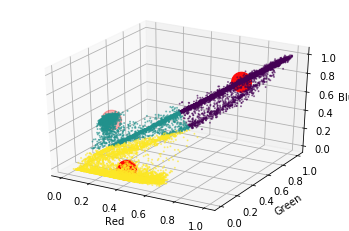

In [8]:
print(error)
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

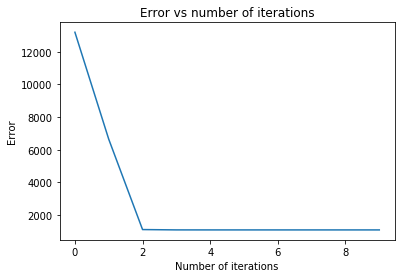

In [9]:
plt.plot( np.arange(num_it) , error)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Error vs number of iterations")
plt.show()

#print(error)

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [10]:
kmeans =  sklearn.cluster.KMeans( n_clusters = 3 , init='k-means++', n_init=5, max_iter=15, random_state=None)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

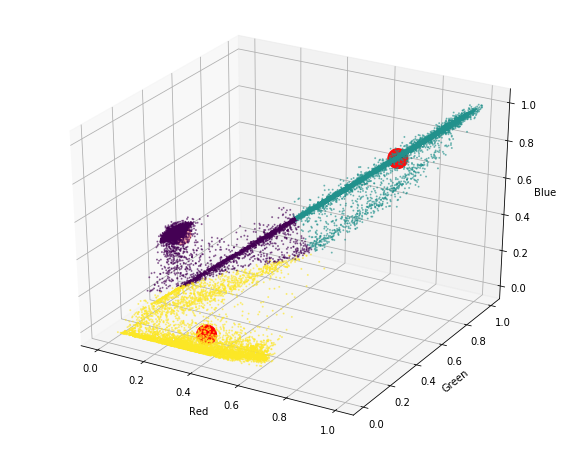

In [11]:
fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c= kmeans.labels_ , s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

In [12]:
print("Centroids with my kmean are:\n", mykmeans_centers)
print("Centroids from sklearn k-means are:\n", kmeans.cluster_centers_ )

print("Loss function with my kmean is: " , error[-1])
print("Loss function from sklearn k-means is: ", kmeans.inertia_)

Centroids with my kmean are:
 [[0.77998175 0.77044226 0.76776639]
 [0.07859449 0.39470509 0.34315436]
 [0.39262661 0.05386229 0.0671155 ]]
Centroids from sklearn k-means are:
 [[0.07873168 0.39468092 0.34314459]
 [0.77998175 0.77044226 0.76776639]
 [0.39254413 0.05346081 0.06675174]]
Loss function with my kmean is:  1092.8765497481986
Loss function from sklearn k-means is:  1092.8782012696788


Plots do match and the loss functions are quite the same (since we put a tolerance of 1e-3),  but the implementation we did is really slow compaired to the one provided by sklearn library. It can be seen also that the position of the centroids of the clusters is the same (see below the two plots), thus concluding that we implemented a correct k-means algorithm, but not efficient at all.
In our implementation, we also added a check that centroids must be different at the very first step, in order to avoid problems due to the fact that clusters can be empty. Neglecting it, some problems can occurr.

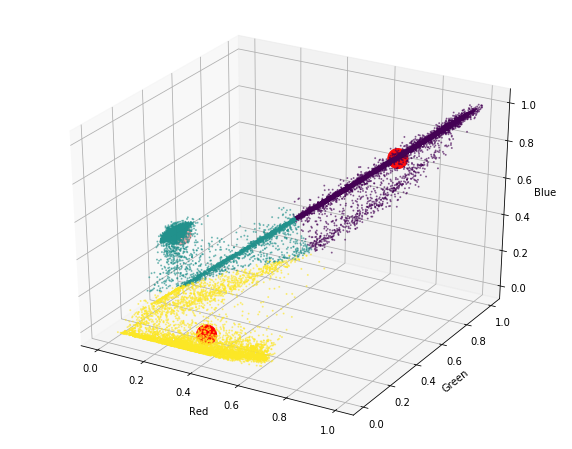

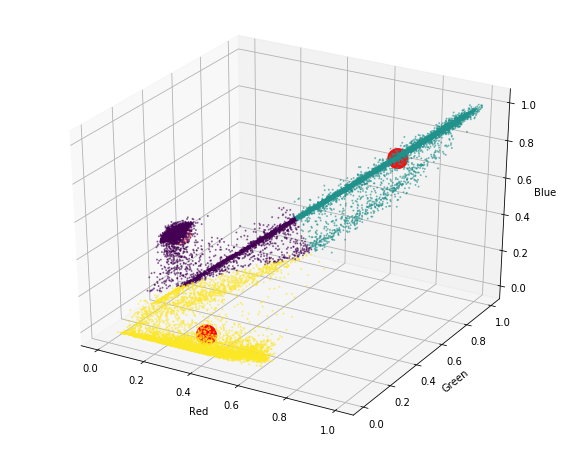

In [13]:
fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

fig = pyplot.figure(figsize=(10,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c = kmeans.labels_ , s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

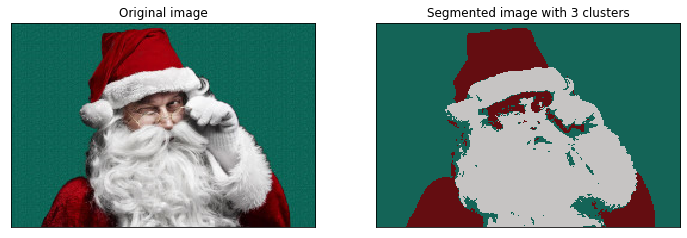

In [14]:
# ADD CODE TO DISPLAY THE IMAGE OBTAINED USING SKLEARN 
segmented = kmeans.cluster_centers_[kmeans.labels_.flatten()]
result_image = segmented.reshape((image1.shape))

plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.xticks([]) 
plt.yticks([])
plt.imshow(image1)
plt.title("Original image") 


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(result_image)
plt.title("Segmented image with 3 clusters")
plt.show()

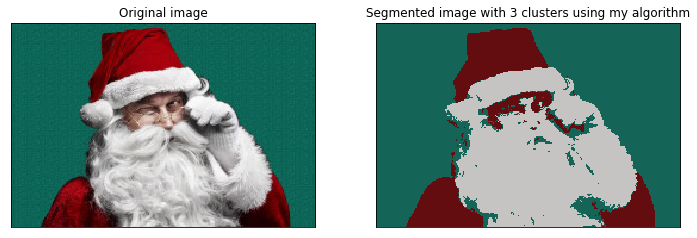

In [15]:
# ADD CODE TO DISPLAY THE IMAGE OBTAINED WITH YOUR CODE
my_segmented = mykmeans_centers[clusters]
my_result_image = my_segmented.reshape((image1.shape))

plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.xticks([]) 
plt.yticks([])
plt.imshow(image1)
plt.title("Original image") 


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(my_result_image)
plt.title("Segmented image with 3 clusters using my algorithm")
plt.show()

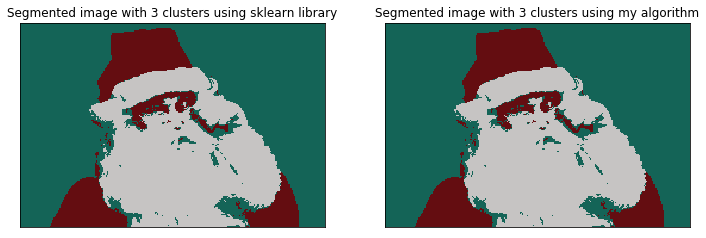

In [16]:
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(result_image)
plt.title("Segmented image with 3 clusters using sklearn library")

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(my_result_image)
plt.title("Segmented image with 3 clusters using my algorithm")
plt.show()

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

Compressed images are actually the same, as I expected after having looked at the loss and cluster centers: they are very close. Clustering is really useful for image segmentation as well as for image compression. 
In the first case we can tell easily which is the background, and the person in the foreground (i.e. Claus here) with some features of him, for example his clothes and his beard. 
In this way we can also compress the image keeping just a few colours (red, green and white) that are present for the most part of the picture, thus saving the most important part of information. 
Clustering it is useful also because it is very fast, and not so difficult to implement.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)


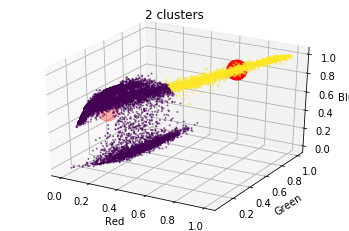

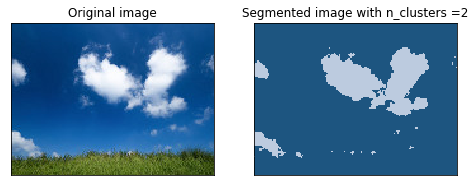

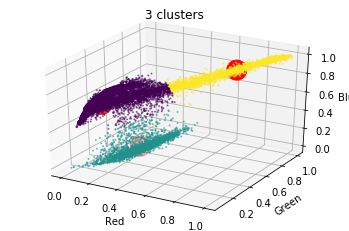

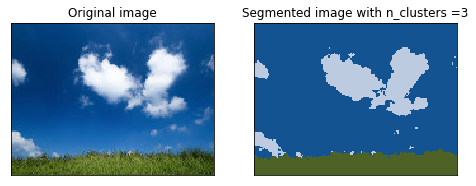

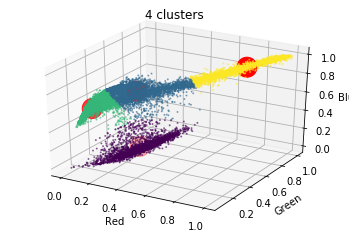

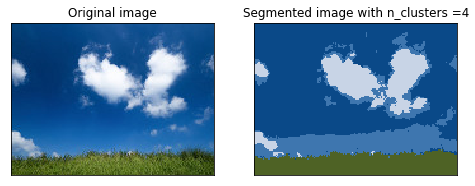

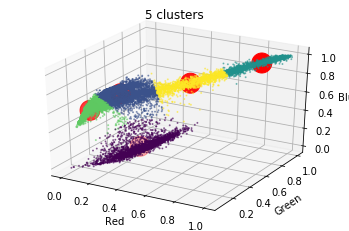

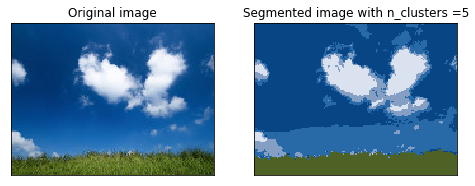

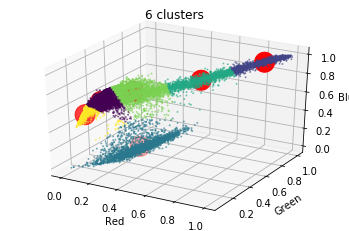

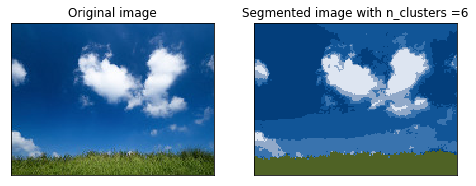

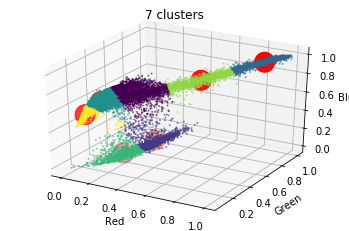

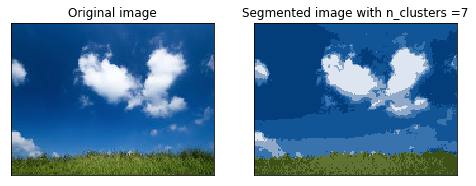

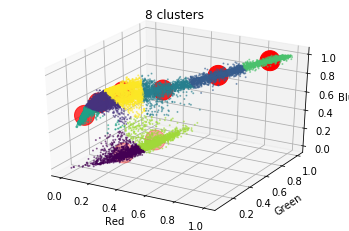

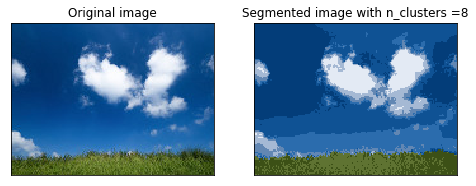

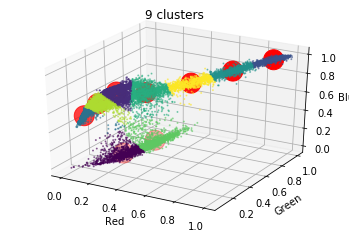

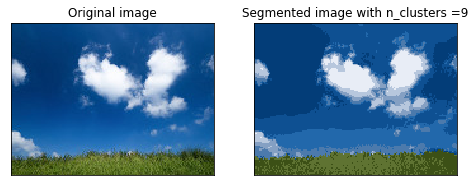

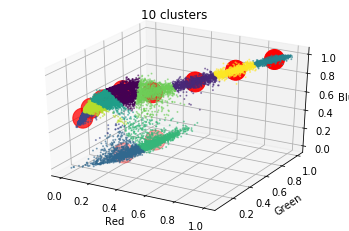

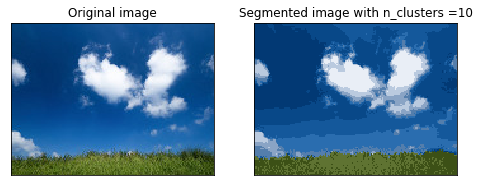

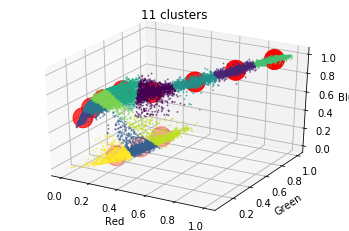

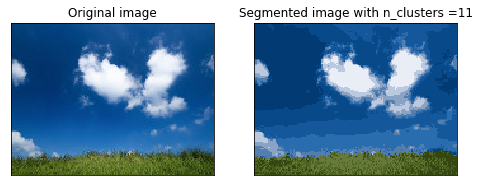

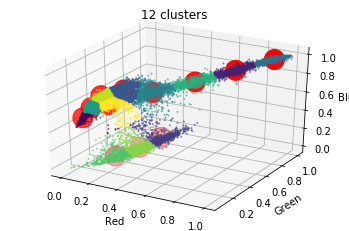

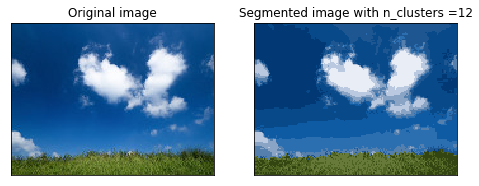

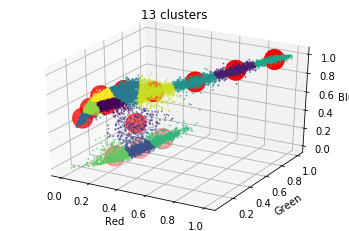

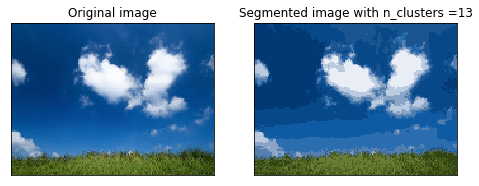

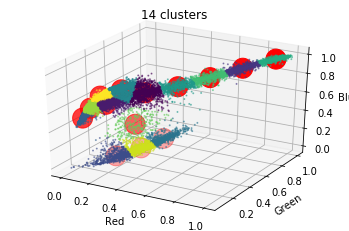

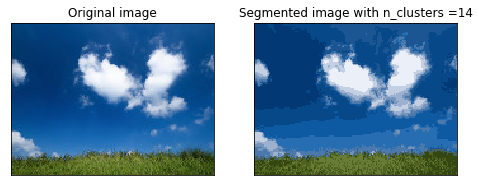

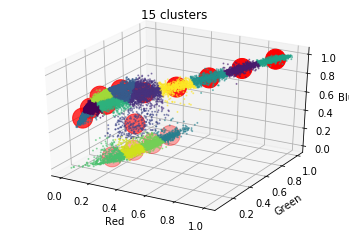

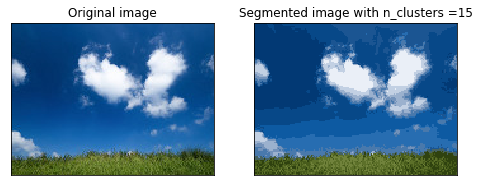

In [17]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

print(data.shape)
error = []

for k in range(2,16):
    kmeans = sklearn.cluster.KMeans( n_clusters = k , init='k-means++', n_init=5, max_iter= 300, random_state=None)
    kmeans.fit(data)
    
    error.append(kmeans.inertia_)
    
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_title(str(k)+" clusters")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c = kmeans.labels_ , s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
    pyplot.show()
    
    segmented = kmeans.cluster_centers_[kmeans.labels_.flatten()]
    result_image = segmented.reshape((image2.shape))

    plt.figure(figsize = (8,8))
    plt.subplot(1,2,1)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(image2)
    plt.title("Original image") 


    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(result_image)
    plt.title("Segmented image with n_clusters ="+str(k))
    plt.show()
    

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

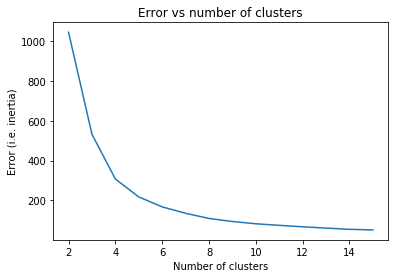

In [18]:
plt.plot( np.arange(2,16) , error)
plt.xlabel("Number of clusters")
plt.ylabel("Error (i.e. inertia)")
plt.title("Error vs number of clusters")
plt.show()

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

We observe, as we would expect, that increasing the number of the clusters the loss function becomes less and less. It can be seen graphically also in the images above: starting from 2 clusters we can't tell at all that we are dealing with a landscape made by a sky and some clouds. Indeed, using 3 clusters we start to understand something, since we see start telling the grass below, and using 4 clusters we understand what is the subject of our picture. After that, we increase the number of particulars that we add in describing the image, so we are less compressing it, thus decreasing the loss. Indeed, it can be seen in the graph above: from 2 to 5 clusters the curve is really steep, and it means that we are losing an important part of the image feature. From 8-10 and more, they are not so important (curve is "constant").


If we had to choose one model, the best number of clusters would be around 6, so we can both have a good compression of the image and a good description of it. 

(140500, 3)


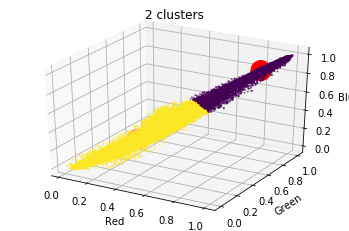

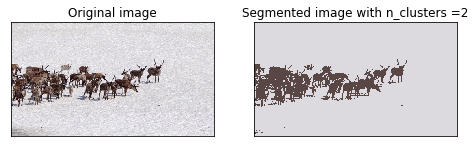

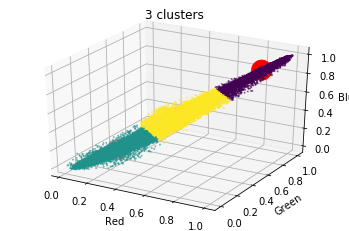

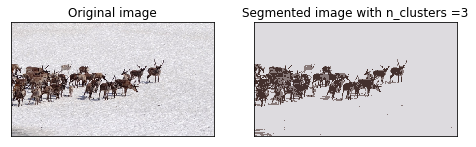

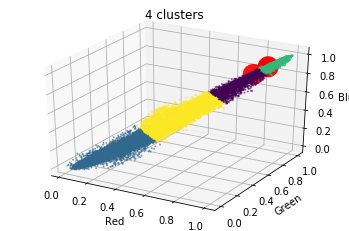

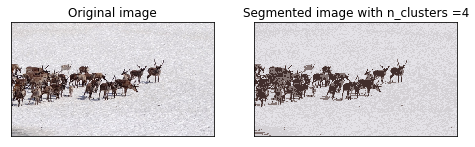

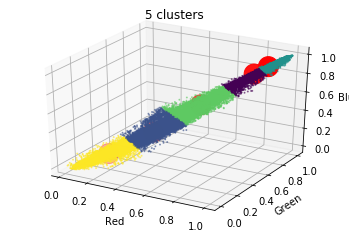

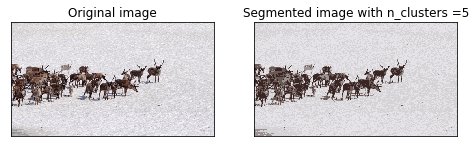

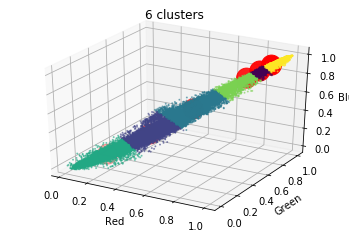

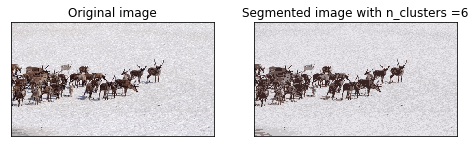

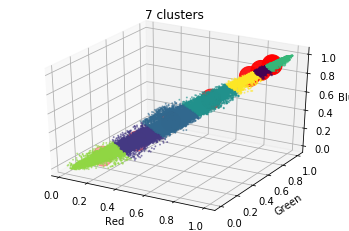

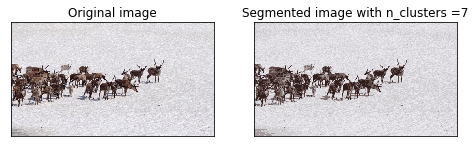

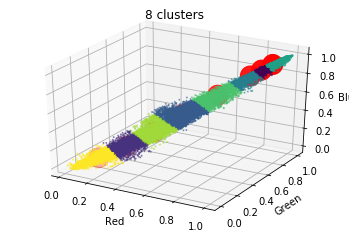

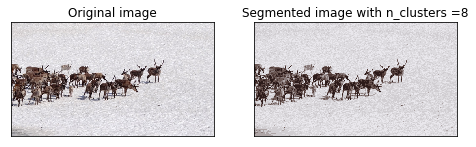

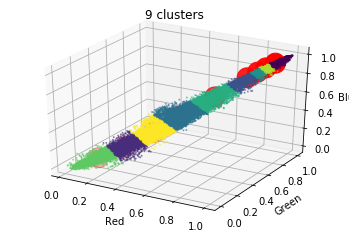

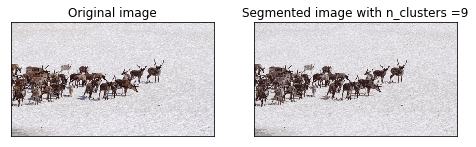

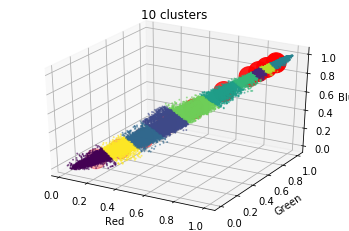

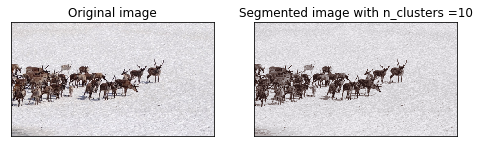

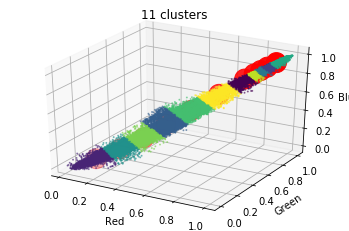

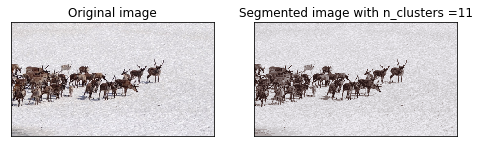

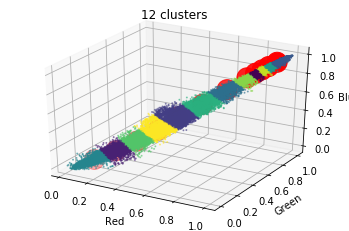

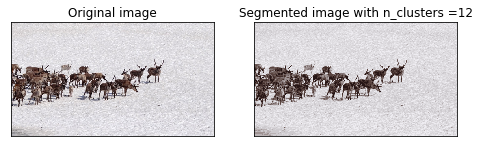

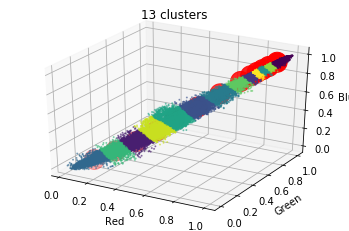

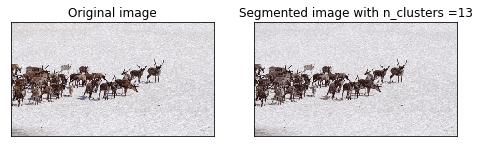

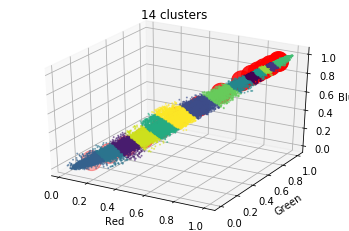

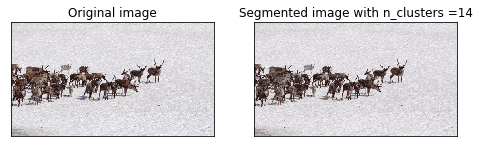

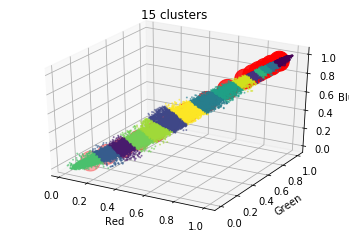

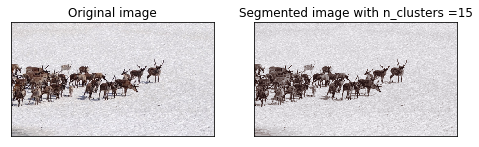

In [19]:
data = image3.reshape(image3.shape[0]*image3.shape[1], 3) / 255
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

print(data.shape)
error = []

for k in range(2,16):
    kmeans = sklearn.cluster.KMeans( n_clusters = k , init='k-means++', n_init=5, max_iter= 300, random_state=None)
    kmeans.fit(data)
    
    error.append(kmeans.inertia_)
    
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_title(str(k)+" clusters")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c = kmeans.labels_ , s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
    pyplot.show()
    
    segmented = kmeans.cluster_centers_[kmeans.labels_.flatten()]
    result_image = segmented.reshape((image3.shape))

    plt.figure(figsize = (8,8))
    plt.subplot(1,2,1)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(image3)
    plt.title("Original image") 


    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(result_image)
    plt.title("Segmented image with n_clusters ="+str(k))
    plt.show()
    


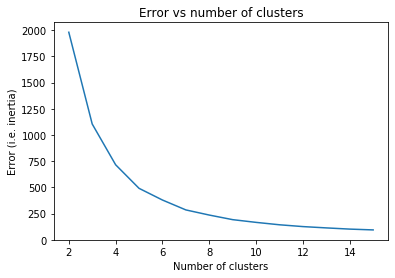

In [20]:
plt.plot( np.arange(2,16) , error)
plt.xlabel("Number of clusters")
plt.ylabel("Error (i.e. inertia)")
plt.title("Error vs number of clusters")
plt.show()

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [21]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm
import seaborn as sns

# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [22]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='single', distance_threshold=None)
predicted_db = db.fit_predict(X)

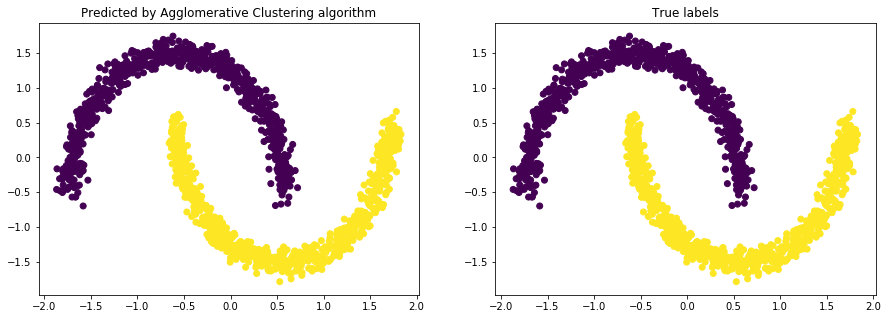

In [23]:
# Plot result
fig, ax = plt.subplots( 1, 2, figsize = (15 , 5))

ax[0].scatter(X[:,0],X[:,1], c = predicted_db)
ax[0].set_title("Predicted by Agglomerative Clustering algorithm")

ax[1].scatter(X[:,0],X[:,1], c = labels_true)
ax[1].set_title("True labels")

plt.show()

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

In [24]:
kmeans_circle = sklearn.cluster.KMeans( n_clusters = 2 , init='k-means++', n_init=5, max_iter= 300, random_state=None)
kmeans_circle.fit(X)
predicted_km = kmeans_circle.predict(X)

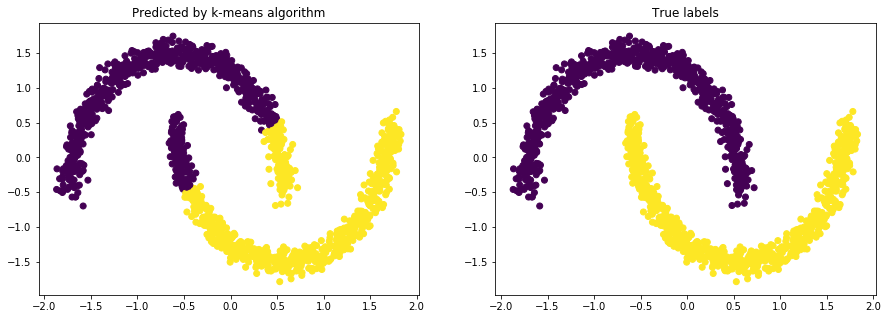

In [25]:
# Plot result
fig, ax = plt.subplots( 1, 2, figsize = (15 , 5))

ax[0].scatter(X[:,0],X[:,1], c = predicted_km)
ax[0].set_title("Predicted by k-means algorithm")

ax[1].scatter(X[:,0],X[:,1], c = labels_true)
ax[1].set_title("True labels")

plt.show()


 Confusion matrix for Agglomerative Clustering algorithm


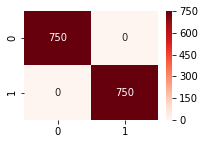

It is perfectly classified!




 Confusion matrix for K-Means algorithm


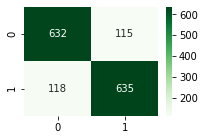

There are some labels misclassified!


In [26]:
confusion_db = skm.confusion_matrix( predicted_db , labels_true)


confusion_km = skm.confusion_matrix( predicted_km , labels_true)

print("\n Confusion matrix for Agglomerative Clustering algorithm")
plt.figure(figsize = (3,2))
sns.heatmap(confusion_db, annot=True, fmt="d", cmap="Reds" )
plt.show()
print("It is perfectly classified!\n\n\n")


print("\n Confusion matrix for K-Means algorithm")
plt.figure(figsize = (3,2))
sns.heatmap(confusion_km, annot=True, fmt="d", cmap="Greens" )
plt.show()
print("There are some labels misclassified!")

## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



Agglomerative clustering, as we can see both from confusion matrix and from the plots, is the best way to classify our points in this case, since there are no misclassification. It is due to the fact of the update rule of the algorithm: in K-means we compute the centers of the clusters and we associate points to them using their distance as parameter. But as we can see it doesn't work properly for the points in the center of the plot. 
On the other hand the agglomerative clustering is more useful for our purposes, keeping in mind the shape of our training set and it "symmetry".